# ORIE 4580/5580/5581 Assignment 3

#### Students: Sean Benko (snb55) and Sean Hansen (seh265)

### Github link: [example Github link](https://github.com/SidBanerjee/ORIE4580-Simulation/blob/main/Notebooks/Unit0-Intro_Demos.ipynb)


### Instructions


* Due Friday September 22, at 11.59am on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/56826#:~:text=Assignments-,Assignments,-Assignments%20Module%20publish). Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Bard or ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**. You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Suggested reading

Chapters 7 (you can skim through this), and chapters 8 and 9 of [Introduction to Probability](https://chance.dartmouth.edu/teaching_aids/books_articles/probability_book/book.html) by Grinstead and Snell.

Chapter 3 and chapter 4 (up to section 4.5) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).

In [2]:
#importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline

___
___

## Question 1: Combining LCGs (20 points)

In order to avoid biases, simulations should not use anywhere near the full period of an LCG (otherwise, the random sequence repeats\ldots). For example, a typical traffic simulator may have $10,000$ vehicles, each experiencing thousands of random disturbances, thus needing around $10^7$ random samples per replication -- for this, an LCG using $m=2^{31}-1\approx 2\times 10^9$ is insufficient, as after $100$ replications the sequences get correlated.

One method to combine multiple LCGs to obtain a generator with a longer period is to add a smaller period LCG to it. For example, suppose we have two generators $X_{n+1}  =  (a_1 X_n) \mbox{ mod } m_1$ and $Y_{n+1}  =  (a_2 Y_n) \mbox{ mod } m_2$, with $m_1>m_2$. We can derive a combined generator by setting $Z_n  =  (X_n + Y_n) \mbox{ mod } m_1$. If properly designed, the resulting period can be on the order of $m_1m_2$. We will now study a small example to see how this works.


___
**(a)** Consider two LCGs, $x_{n+1} = (5 x_n) \mod 16$ and $y_{n+1} = (2 y_n) \mod 7$. Starting both with seed $x_0 = y_0 = 1$, plot the sequences $x_n, y_n$ using the clock visualization introduced in class (separate plot for each sequence; you can use and modify the code in Demo-PRNGs.ipynb on Canvas).
___

In [2]:
# Functions to visualize LCG sequence on clock (see demo notebook)


In [3]:
# Function to generate pseudorandom sequence using LCG
# Set default parameters to glibc specifications (see demo notebook)


In [50]:
# Ans
def LCG(n, m=2**31-1, a=1103515245, c=12345, seed=1):
    """
    Generate a pseudorandom sequence using a Linear Congruential Generator (LCG).

    Parameters:
    n (int): The number of pseudorandom numbers to generate.
    m (int): The modulus value (default is 2^31-1, following glibc specifications).
    a (int): The multiplier value (default is 1103515245, following glibc specifications).
    c (int): The increment value (default is 12345, following glibc specifications).
    seed (int): The initial seed value (default is 1).

    Returns:
    numpy.ndarray: An array of pseudorandom numbers in the range [0, 1).
    """
    # Initialize an array to store the generated pseudorandom numbers
    output = np.zeros(n)

    x = seed
    for i in range(n):
        # Calculate the pseudorandom number and normalize it to [0, 1)
        output[i] = (x + 1.0) / (m + 1.0)

        # Update the LCG state using the specified parameters
        x = (a * x + c) % m
    return output

In [51]:
def plot_clock_face(m, fig, annotate=False):
    """
    Plot points on a unit circle representing the LCG sequence on a clock face.

    Parameters:
    m (int): The modulus value for the LCG sequence.
    fig (matplotlib.figure.Figure): The figure object to draw on.
    annotate (bool): Whether to annotate points with their index.

    Returns:
    None
    """
    # Plot m points on the unit circle
    for i in range(m):
        theta = 2.0 * np.pi * i / m
        plt.plot(np.sin(theta), np.cos(theta), 'rs', markersize = 10)
        if annotate:
            plt.annotate(str(i), (np.pi/2 - theta, 1.05), xycoords='polar')

def plot_clock_path(m, x, fig, color='y'):
    """
    Plot the path of an LCG sequence on a clock face.

    Parameters:
    m (int): The modulus value for the LCG sequence.
    x (numpy.ndarray): The LCG sequence.
    fig (matplotlib.figure.Figure): The figure object to draw on.
    color (str): The color for the path.

    Returns:
    None
    """
    # Plot the seed node
    theta_0 = 2.0 * np.pi * (x[0] * (m + 1) - 1) / m
    plt.plot(np.sin(theta_0), np.cos(theta_0), 'gs', markersize = 10)

    # Plot the path of the LCG sequence
    for i in range(len(x) - 1):
        theta_start = 2.0 * np.pi * (x[i] * (m + 1) - 1) / m
        theta_end = 2.0 * np.pi * (x[i + 1] * (m + 1) - 1) / m
        x_start = np.sin(theta_start)
        y_start = np.cos(theta_start)
        del_x = np.sin(theta_end) - np.sin(theta_start)
        del_y = np.cos(theta_end) - np.cos(theta_start)
        if abs(del_x) > 0 or abs(del_y) > 0:
            plt.arrow(x_start, y_start, del_x, del_y,
                      length_includes_head=True, head_width=0.05, head_length=0.1, fc=color, ec=color)

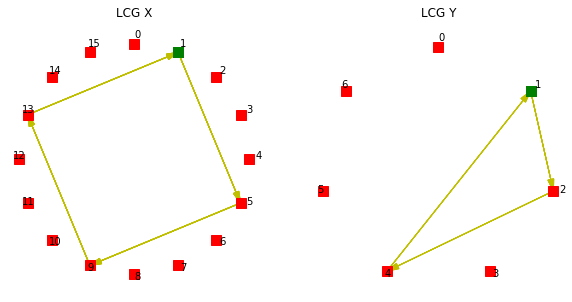

In [52]:
# Ans

# x LCG
m_x = 16
a_x = 5
c_x = 0
seed_x = 1

fig = plt.figure(figsize=(10,5))
x = LCG(n = m_x + 1, m = m_x, a=a_x, c = c_x, seed = seed_x)

# y LCG
m_y = 7
a_y = 2
c_y = 0
seed_y = 1
y = LCG(n = m_y + 1, m = m_y, a = a_y, c = c_y, seed = seed_y)

plt.subplot(1, 2, 1)
plt.title("LCG X")
plot_clock_face(m_x, fig, annotate = True)
plot_clock_path(m_x, x, fig)
plt.axis('equal')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("LCG Y")
plot_clock_face(m_y, fig, annotate = True)
plot_clock_path(m_y, y, fig)
plt.axis('equal')
plt.axis('off')
plt.show()

___
**(b)** Next, define a combined LCG as $z_{n} = (x_n+y_n) \mod 16$. Starting both the base LCGs with seed $x_0 = y_0 = 1$, plot the sequence $z_n$ using the clock visualization given in class.
___

In [53]:
def LCGnoNorm(n, m=2**31-1, a=1103515245, c=12345, seed=1):
    # Initialize an array to store the generated pseudorandom numbers
    output = np.zeros(n)

    x = seed
    for i in range(n):
        # Calculate the pseudorandom number
        output[i] = x

        # Update the LCG state using the specified parameters
        x = (a * x + c) % m
    return output

def LCGcombine(n, m=2**31-1, a=1103515245, c=12345, seed=1):
    # Initialize an array to store the generated pseudorandom numbers
    output = np.zeros(n)

    z = seed
    x = LCGnoNorm(n, 16, 5, 0, 1)
    y = LCGnoNorm(n, 7, 2, 0, 1)
    for i in range(n):
        # Calculate the pseudorandom number and normalize it to [0, 1)
        z = x[i] + y[i] % 16
        output[i] = (z + 1.0) / (m + 1.0)

        # Update the LCG state using the specified parameters
        z = (a * z + c) % m
    return output

(-1.1, 1.1, -1.100023397648169, 1.1004913506115477)

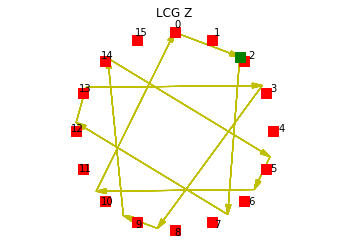

In [54]:
z = LCGcombine(100, 17)
plt.title("LCG Z")
plot_clock_face(16, fig, annotate = True)
plot_clock_path(16, z, fig)
plt.axis('equal')
plt.axis('off')

___
**(c)** What are the periods of the pseudo-random sequences $x_n, y_n$ and $z_n$?
___


### Ans.
$x_n=4$

$y_n=3$

$z_n=12$

___
___
## Question 2: inverting cdfs (25 pts)

In class, we defined $F^{-1}(y)$ for a continuous increasing cdf $F(x)$ as the unique $x$ such that $F(x) = y$ (for $y\in[0,1]$). More generally, for any cdf $F$ we can use the inversion method based on its generalized inverse or *pseudoinverse*:
	$$F^{-1}(y) = \inf\{x|F(x)\geq y\}$$
	(where $\inf$ denotes the \href{https://en.wikipedia.org/wiki/Infimum_and_supremum}{infimum}; if you have not seen this before, treat it as minimum).


___
**(a)** Find the pseudoinverse $F^{-1}(y)$ for the following mixed (discrete/continuous) cdf
	$$F(x)=
	\begin{cases}
	0 & \mbox{for $x < 0$}\\
	x & \mbox{for $0 \leq x < \frac{1}{2}$}, \\
	\frac{1}{2} & \mbox{for $\frac{1}{2}\leq x < 1$}, \\
	1 & \mbox{for $x\geq 1$}
	 \end{cases}$$
___

### Ans.
$$F^{-1}(y)=-∞ \text{ for y < 0}$$
$$=y\text{ for 0 <= y < 1/2}$$
$$=1/2\text{ for 1/2 <= y <1}$$
$$=1\text{ for y >= 1}$$

___
**(b)** Use the above definition to get an inversion algorithm for the $Geometric(p)$ distribution (with pmf $p(k) = p(1-p)^{k-1}\,\forall\,k\in\{1,2,3,\ldots\}$). Implement this, and generate and plot the histogram of 1000 samples from a $Geometric(0.42)$ distribution.
(For this, it may be useful for you to first understand how the [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) library works, and in particular, how it provides methods to compute various statistics for many different random variables, including the [geometric r.v.](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.geom.html#scipy.stats.geom))
___

In [56]:
def geo(num, p):
  samples = []
  for i in range(num):
    random=np.random.rand()
    samples.append(scipy.stats.geom.ppf(random,p))
  return samples

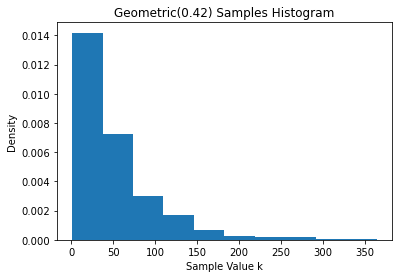

In [57]:
probability = .02
numSamples = 1000

samples = geo(numSamples,probability)

plt.hist(samples, bins = 10, density = True)
plt.title("Geometric(0.42) Samples Histogram")
plt.xlabel("Sample Value k")
plt.ylabel("Density")
plt.show()

___
**(c)** The p.d.f. of the random variable $X$ is given by
	$$
	f(x) =
	\begin{cases}
		e^{x-2} & \text{for }0 \leq x \leq 2, \\
		e^{-x} & \text{for }x > 2, \\
		0 & \text{otherwise,}
	\end{cases}
	$$
	Describe and implement an inversion algorithm to generate samples of $X$. Generate 1,000 samples and plot a histogram. Compare the histogram and the p.d.f.


___

### Ans.


$$\text{Integrate the PDF to get the CDF}$$
$$\text{Then take the inverse to get the inverse CDF}$$

In [58]:
def pdf(x):
  if 0 <= x <= 2:
    return np.exp(x-2)
  elif x > 2:
    return np.exp(-x)
  else:
    return 0

In [59]:
def inv_cdf(x):
  if x > 1-np.exp(-2):
    return(-1*np.log(1-x))
  else:
    return(np.log(x+np.exp(-2))+2)

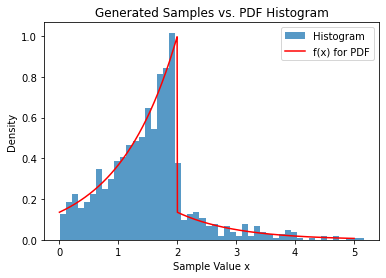

In [60]:
numberOfSamples = 1000
samp = [inv_cdf(np.random.rand()) for _ in range(numberOfSamples)]
xVals = np.linspace(0,5,1000)
pdfVals = [pdf(i)for i in xVals]
plt.hist(samp, bins = 50, density = True, alpha = .75, label = 'Histogram')
plt.title("Generated Samples vs. PDF Histogram")
plt.xlabel("Sample Value x")
plt.ylabel("Density")
plt.plot(xVals,pdfVals,'r',label='f(x) for PDF')
plt.legend()
plt.show()

___
___

## Question 3: Acceptance-Rejection (25 pts)

Let the random variable $X$ have density
$$f(x) = \begin{cases} (5 x^4 + 4x^3 + 3x^2+1)/4  & \text{ for } 0 \leq x \leq 1, \\
0 & \text{ otherwise. } \end{cases}$$

___
**(a)** Give an acceptance-rejection algorithm to generate samples of
	$X$.
    


___

We can see that the values that f(x) can take are within the range: 

We want to find a distribution g(x) that envelopes f(x) s.t. we satisfy the criteria for rejection/acceptance.

$$ M \geq \frac{f(x)}{g(x)} $$

For some constant C.
To calculate C, we will use the maximum value that f(x) can take. We compute this by taking the derivitive and find the greatest f(x) value at the distribution's critical points. This point is $x=1$ and evaluates to $13/4$.

Thus, our ratio is equal to M=13/4, as, $$M=\frac{f(1)}{g(1)}= \frac{13/4}{1}=13/4 $$

We now have the criteria:

$$ 13/4 \geq \frac{f(x)}{g(x)} $$

For each sample u we take from our scaled uniform distribution, $g(x)=\frac{13}{4}U[0,1]$ , if the above is not met, we reject the sample and discard the generated value. If the value is accepted we, store it within the distribution X we are forming. 

We declare X~f(x) for the accepted points, we keep repeating the sampling process to form to generating samples of X.

___
**(b)** On average, how many samples from the uniform distribution over $[0, 1]$ would your acceptance-rejection algorithm need in order to generate one sample of $X$?
___

In other words we are looking for the expected number of samples from [0,1] until we get one accepted. This can be modeled using a geometric distribution, where p=P(accept), the ratio of the areas of the two distributions with the uniform distribution being the denominator.

We know that the area under f(x) can be gounf by integrating the function:

$$\int_0^1{\frac{1}{4}(5 x^4 + 4x^3 + 3x^2+1)}  dx=1$$
As expected for a valid pdf

The ratio of these areas is $\frac{1}{(13/4)}$

Thus, we for a given point, $P[accepted]=\frac{1}{M(b-a)}=\frac{1}{13/4}$

However, note that we are generating two samples for each acceptance/rejection iteration.

Thus, by the geometric distribution's definition of expectation, we conclude we will need to , on average sample $$\frac{13}{2}$$




___
**(c)** Use your algorithm in (a) to generate 2,500 samples of $X$. Note that this will require more than 2500 uniform random variables.

Plot a histogram of your sample   and compare it against the true pdf.
___


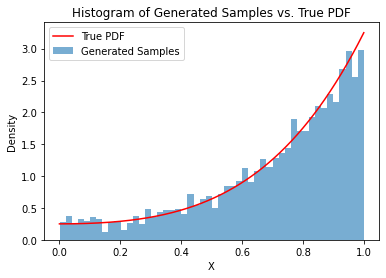

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the target density function f(x)
def f(x):
    return (5 * x**4 + 4 * x**3 + 3 * x**2 + 1) / 4

# Define the envelope function g(x) (scaled uniform distribution)
M = 13/4  # Constant, not a random variable
def g(x):
    return M

# Function to generate a sample of X using acceptance-rejection
def generate_samples(num_samples):
    accepted_samples = []
    while len(accepted_samples) < num_samples:
        # Generate a random sample from the uniform distribution [0, 1]
        u = np.random.rand()
        # Generate a random sample from the envelope g(x)
        x = np.random.rand()
        # Calculate the acceptance criterion
        if u <= f(x) / g(x):
            accepted_samples.append(x)
    return accepted_samples

# Generate 2,500 samples of X
num_samples = 2500
samples = generate_samples(num_samples)

# Plot a histogram of the generated samples
plt.hist(samples, bins=50, density=True, alpha=0.6, label='Generated Samples')
# Plot the true pdf for comparison
x_values = np.linspace(0, 1, 1000)
plt.plot(x_values, [f(x) for x in x_values], 'r', label='True PDF')
plt.xlabel('X')
plt.ylabel('Density')
plt.legend()
plt.title('Histogram of Generated Samples vs. True PDF')
plt.show()


___
___

## Question 4: Generalized Acceptance-Rejection (30 pts)

We want to generate a $\mathcal{N}(0,1)$ rv $X$, with pdf
$f(x) = \frac{e^{-x^2/2}}{\sqrt{2\pi}} $,
using generalized acceptance-rejection.

___

**(a)** First, suppose we choose the proposal distribution to be a \emph
{Laplace} (i.e., two-sided Exponential) distribution, which has pdf $g(x) = e^{-|x|}/2$. Describe (and implement) an inversion algorithm to get samples from this distribution.
___

In [4]:
#TA said
import scipy.stats as stats
#stats.laplace.ppf(unifrom)
#ppf is the CDF inverse

1. Define pdfs:
- Taget PDF: $f(x)=\frac{e^{-x^2/2}}{2\pi^{1/2}} $ for $x \in \mathbb{R}$
- Proposal PDF: $g(x)=\frac{e^{-|x|/2}}{2}$ for $x \in \mathbb{R}$

2. Find the Constant M:

To apply the acceptance-rejection method, we need to find the constant M s.t. $f(x)\leq Mg(x)$ for all x. Since both f(x) and g(x) are positive for all x, you can simplify the inequality to $f(x)\leq Mg(x)$.

3. Compute M:
In this step, you'll calculate M.
We want the maximum values of f(x) and g(x) to compute M. For the Laplace distribution, g(x) is maximized at x=0, as well as f(x). Plugging in 0 to both functions we calculate:
$$$$
$M =\frac{f(0)}{g(0)}=\frac{\frac{1}{2\pi^{1/2}}}{\frac{1}{2}} =(\frac{2}{\pi})^{1/2}$

4. Generate Random Samples
Once you have M, you can generate random samples as follows:
- Generate a random sample s from the Laplace distribution g(x)
- Generate a random uniform value u between 0 and 1
- If $uM\leq\frac{f(x)}{g(x)}$, we accept the sample x, otherwise we reject the sample. We then repeat the sampling process.


In [1]:
import scipy.stats as stats
import numpy as np

# Number of samples to generate
num_samples = 1000

# Generate random samples from the standard normal distribution
samples = stats.norm.ppf(np.random.rand(num_samples))

# 'samples' now contains random samples from N(0, 1)
print(samples)


[-6.55745640e-01 -8.37998347e-01  9.97555167e-01 -9.51105120e-01
 -6.00403086e-01  1.25087454e+00  1.15616250e+00  3.07069416e-01
 -8.13252099e-01  2.56292118e-02 -1.87298904e+00  1.07657374e+00
 -1.48780161e+00  7.01644102e-02  1.68933953e-01  4.83897204e-01
  1.23479346e-01 -3.71615918e-01  2.31673551e-01 -2.05744974e-01
 -1.58505411e-01  4.67096312e-01 -8.15444796e-02 -5.43805610e-01
  1.48448227e-01 -1.38106727e-01  6.58519635e-01  8.12462757e-01
 -1.30534872e+00  1.50106960e+00  1.75238977e+00 -1.14483765e-02
  1.36616030e+00 -1.34247195e+00 -7.50650978e-01 -4.25731680e-01
 -1.61513796e+00  5.60398764e-01 -2.17052438e+00 -2.25908527e-01
  9.64227732e-01 -8.73481397e-01  1.79382434e-01 -2.21485340e-01
 -1.60201012e+00 -2.26312392e+00 -2.16110177e+00 -1.46469081e+00
 -1.62065433e-02  7.68841971e-01  4.99223161e-01  8.61558180e-01
  1.21964933e+00 -6.29050410e-02  1.08221797e+00  2.51333961e+00
 -2.00737800e-01 -1.16414759e+00 -7.42057520e-01  5.65986913e-01
  7.74526669e-01 -1.03113

___
**(b)** Determine the smallest $k$ such that $kg(x)\geq f(x)\,\forall\,x\in\mathbb{R}$. Using this, propose (and implement) an acceptance-rejection algorithm for sampling $X\sim\mathcal{N}(0,1)$, and compute the expected number of samples needed for generating each sample.
___


To determine the smallest value of k such that $kg(x)\leq f(x)$ for all $x\in \mathbb{R}$, you need to find the maximum ratio f(x)/g(x). Once you have k, you can implement an acceptance-rejection algorithm using this value. The expected number of smaples needed for generating each sample is given by 1/k.

Here are the steps:

1. Find the maximum ratio f(x)/g(x) for all $x \in \mathbb{R}$
You want to find the maximum value of f(x)/g(x) over the entire real line. This maximum ratio will determine the value of k.
2. Determin the Value of k:
Set k to be the smallest interger greater than or equal to the maxium ration found in step 1. This ensures that $kg(x)\geq f(x) for all x$
3. Implement Acceptance Rejection Algo:
This is simimlar to to the one from part a)
Now that you have the value of k, you can implement the acceptance-rejection algorithm as follows:
- Generate a random sample  s from the distribution with PDF g(x).
- Generate a random uniform value u between 0 and 1.
- Calculate $c=\frac{f(s)}{kg(s)}$
Here's where you decide whether to accept or reject the sample:
If u≤c, accept the sample s as a sample from the target distribution f(x).
If u>c, reject the sample and repeat the process to generate a new sample.
4. Compute the Expected Number of Samples Needed:
The expected number of samples needed to generate each sample from the target distribution using this acceptance-rejection method is indeed k as this is the expectation of Geo(p=1/k).


Solving foy k, we can simplify to have $k\geq 2/(2\pi)^{1/2}e^{-\frac{(|x|-1)^2}{2}} \forall x$
But the exponent is positive, thus the smallest k is:
$$k=\sqrt{\frac{2e}{\pi}}$$

To compute the expected number of samples we know that 
$$P(V\leq f(U)) \text{ where } V\sim Unif[0,Mg(V)]$$
$$=P(V'\leq)\text{ where }V\sim Unif[0,1]$$
$$=\mathbb{E}[\mathbb{1}_{V'\leq\frac{f(u)}{Mg(u)}}]$$
$$=\mathbb{E}[\mathbb{E}[\mathbb{1}_{V'\leq\frac{f(u)}{kg(u)}}|U]]$$ By the tower property
$$=\mathbb{E}[P_a(V'\leq\frac{f(u)}{kg(u)}|U)]$$
$$=\mathbb{E}[\frac{f(U)}{kg{U}}]$$
$$=\int\frac{f(U)}{kg{U}}\cdot g(u)du=\frac{1}{k}$$
Thus, because the expectedation of a geometric series is $p^{-1}$

So the expected number of samples generated is 2/P[Accept]=2/(1/k) because we generate from two distributions.

Our final answer is therefore:
$$2\cdot\sqrt{\frac{2e}{\pi}}$$


In [12]:
import scipy.stats

k = ((2*np.e)/np.pi)**.5 
num_samples=1000
samples = []
     
while len(samples) < num_samples:
     
    #Generate x-coord of random point
    u1 = np.random.uniform(0, 1)
    scale_parameter=1.0 # for Laplace dist
    x = scipy.stats.laplace.ppf(u1,loc=0, scale=scale_parameter)
     
    #Generate x-coord of random point
    q_x = np.exp(-np.abs(x))/2
    u2 = np.random.uniform(0, 1)
    y = k * q_x * u2
     
    # Calculate f(x) using x-coord
    
    scale_parameter=1.0 # for Laplace dist
    f_x = np.exp(-x ** 2/2) / ((2*np.pi) ** 0.5)
     
    #Check is under curve
    if (y <= f_x):
        samples.append(x)

### Ans.

___
**(c)** Generate $1000$ samples from your method in part (b), and plot the histogram of the samples. Also report the average and 95\% CI for the number of $U[0,1]$ samples needed to generate the $1000$ samples.
___

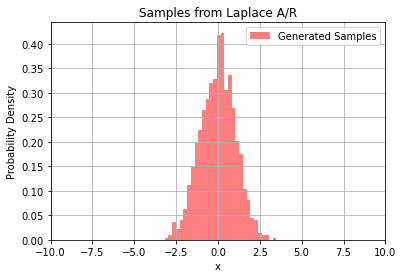

Average Number of Samples Needed:  2629.62
95% CI (2620.885871936525, 2638.354128063475)


In [15]:
# Plot the generate samples
plt.hist(samples, bins=30, density=True, alpha=.5, color='r', label = 'Generated Samples')
x = np.linspace(-10,10,1000)
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Samples from Laplace A/R')
plt.xlim([-10, 10])  
plt.legend()
plt.grid(True)
plt.show()

# Caclculate aver and CI
total = []
for i in range(100):
    total_samples=0
    k=((2*np.e)/np.pi)**0.5
    
    #Number of samples to generate
    num_samples = 1000
    samples=[]
    
        
    while len(samples) < num_samples:
        #Generate x-coord of random point
        u1 = np.random.uniform(0, 1)
        scale_parameter=1.0 # for Laplace dist
        x = scipy.stats.laplace.ppf(u1,loc=0, scale=scale_parameter)
     
        #Generate y-coord of random point
        q_x = np.exp(-np.abs(x))/2
        u2 = np.random.uniform(0, 1)
        y = k * q_x * u2
     
        # Calculate f(x) using x-coord
        f_x = np.exp(-x ** 2/2) / ((2*np.pi) ** 0.5)
     
        #Check is under curve
        if (y <= f_x):
            samples.append(x)
        
        #Keeps track of total samples needed
        total_samples += 2
    total.append(total_samples)

mean = np.mean(total)
sem = scipy.stats.sem(total)
confidence_level = .95
z_score = scipy.stats.norm.ppf(1-(1-confidence_level) / 2)
margin_of_error = z_score * sem
CI = (mean-margin_of_error, mean + margin_of_error)

print("Average Number of Samples Needed: ", mean)
print("95% CI", CI)

___
**(d)** Now, suppose instead we choose the proposal distribution to be a Cauchy  distribution with pdf $g(x) = \frac{1}{\pi(1+x^2)}$. Describe and implement an inversion algorithm to get samples from this distribution, and plot the histogram of 1000 samples from this distribution.
___

To generate samples from a Cauchy distribution with PDF 

$g(x)= \frac{1}{π(1+x^2)}$ you can use the inverse transform method. Here are the steps to implement the algorithm:

1. Generate samples from a uniform distribution U(0,1). You can use a random number generator for this.

2. Apply the inverse of the cumulative distribution function (CDF) of the Cauchy distribution to the uniform samples to obtain samples from the Cauchy distribution.

The cumulative distribution function (CDF) of the Cauchy distribution is given by:

$F(x)= \frac{1}{π}tan^{-1}(x)+\frac{1}{2}$

To get the inverse CDF, you need to solve for x in the equation:

$u=\frac{1}{\pi}tan^{-1}(x)+\frac{1}{2}$

where u is a sample from the uniform distribution. Once you solve for x, you will have a sample from the Cauchy distribution.

Here's a Python implementation of this algorithm and a histogram plot of 1000 samples:

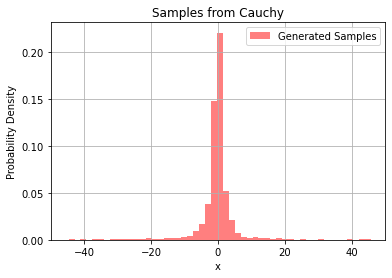

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Number of samples
n_samples = 1000

# Generate uniform samples
u = np.random.uniform(0,1, n_samples)

# Inverse transform sampling using Cauchy inverse
scale=1
samples = scipy.stats.cauchy.ppf(u,loc=0,scale=scale)

#Plot generated samples
plt.hist(samples, bins=300, density=True, alpha=0.5, color='r', label='Generated Samples')
x=np.linspace(-50,50,1000)
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Samples from Cauchy')
plt.xlim([-50, 50])  
plt.legend()
plt.grid(True)
plt.show()


___
**(e)** Repeat parts $(b)$ and $(c)$ for this proposal distribution.
___

b)

To determine the smallest k we want:
$$k\frac{1}{\pi(1+x^2)}\geq\frac{e^{-x^2/2}}{\sqrt{2\pi}}$$
$$k\geq\frac{e^{-x^2/2}}{\sqrt{2\pi}}\cdot\pi(1+x^2)$$
Thus, the smallest is 
$$k=2\sqrt{\frac{\pi}{2e}}$$

To determine the expected number of samples, we use a similar argument to part b) can conclude that be we want the expected for a geometric distribution we have: $2\sqrt{\frac{\pi}{2e}}$ which we then multiply by two because we use two distributions to arrive at the answer:

$$4\sqrt{\frac{\pi}{2e}}$$


To do A/R: 

- Generate the x-coordinate of the random point using the inverse cdf of the Cauchy Distribution
- Generate the y-coordinate of the random point using kg(x)U where U~Unif[0,1]
- Calculate f(x) using the same x-coordinate of the point
- Check if the point is under the f(x) curve or not by seeing if the y-coordinate generated $\leq f(x)$. If under then we accecpt.


In [37]:
#part e.b continued

import scipy.stats
import numpy as np

k = 4*(np.pi/(2*np.e))**.5 
num_samples=1000
samples = []
     
while len(samples) < num_samples:
     
    #Generate x-coord of random point
    u1 = np.random.uniform(0, 1)
    scale=1.0 
    x = scipy.stats.cauchy.ppf(u1,loc=0, scale=scale_parameter)
     
    #Generate y-coord of random point
    q_x = np.exp(-np.abs(x))/2
    u2 = np.random.uniform(0, 1)
    y = k * q_x * u2
     
    # Calculate f(x) using x-coordimport numpy as np

# Constants
k = 4 * np.sqrt(np.pi / (2 * np.e))
num_samples = 1000

# Function to perform Acceptance-Rejection sampling
def acceptance_rejection_sampling():
    samples = []
    while len(samples) < num_samples:
        x = np.random.standard_cauchy()  # Sample from the proposal distribution (cauchy)
        u = np.random.uniform(0, 1)  # Sample from the uniform distribution [0, 1]
        if u < (np.exp(-(np.abs(x) - 1)**2 / 2) * np.sqrt(2 * np.e / np.pi)):
            samples.append(x)
    return samples

# Generate samples
samples = acceptance_rejection_sampling()

# Calculate the average number of samples required
average_samples_needed = 2 * k

# Bootstrap resampling for confidence interval
num_resamples = 10000
resampled_means = []

for _ in range(num_resamples):
    resampled_data = np.random.choice(samples, num_samples, replace=True)
    resampled_mean = 2 * np.sqrt(2 * np.e / np.pi)  # Calculate the average based on the k value
    resampled_means.append(resampled_mean)

# Calculate the 95% confidence interval
confidence_interval = np.percentile(resampled_means, [2.5, 97.5])

# Plot the histogram of generated samples
plt.hist(samples, bins=50, density=True, label='Samples')
x = np.linspace(-5, 5, 400)
plt.plot(x, np.exp(-0.5 * x**2) / np.sqrt(2 * np.pi), 'r-', label='Target Distribution')
plt.legend()
plt.title('Histogram of Generated Samples')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

print("Average number of samples needed:", average_samples_needed * 1000)
print("95% Confidence Interval:", confidence_interval)
    
    scale_parameter=1.0 # for Laplace dist
    f_x = np.exp(-x ** 2/2) / ((2*np.pi) ** 0.5)
     
    #Check is under curve
    if (y <= f_x):
        samples.append(x)

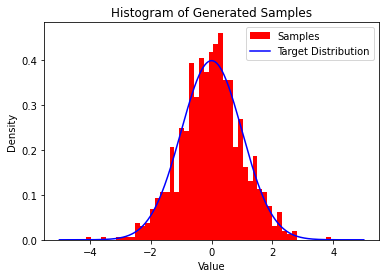

Average number of samples needed: 6081.387604265124
95% Confidence Interval: [2.63097849 2.63097849]


In [68]:
#part e.c

import numpy as np

# Constants
k = 4 * np.sqrt(np.pi / (2 * np.e))
num_samples = 1000

# Function to perform Acceptance-Rejection sampling
def acceptance_rejection_sampling():
    samples = []
    while len(samples) < num_samples:
        x = np.random.standard_cauchy()  # Sample from the proposal distribution (cauchy)
        u = np.random.uniform(0, 1)  # Sample from the uniform distribution [0, 1]
        if u < (np.exp(-(np.abs(x) - 1)**2 / 2) * np.sqrt(2 * np.e / np.pi)):
            samples.append(x)
    return samples

# Generate samples
samples = acceptance_rejection_sampling()

# Calculate the average number of samples required
average_samples_needed = 2 * k

# Bootstrap resampling for confidence interval
num_resamples = 10000
resampled_means = []

for _ in range(num_resamples):
    resampled_data = np.random.choice(samples, num_samples, replace=True)
    resampled_mean = 2 * np.sqrt(2 * np.e / np.pi)  # Calculate the average based on the k value
    resampled_means.append(resampled_mean)

# Calculate the 95% confidence interval
confidence_interval = np.percentile(resampled_means, [2.5, 97.5])

# Plot the histogram of generated samples
plt.hist(samples, bins=50, density=True, color='r' , label='Samples')
x = np.linspace(-5, 5, 400)
plt.plot(x, np.exp(-0.5 * x**2) / np.sqrt(2 * np.pi), 'b-', label='Target Distribution')
plt.legend()
plt.title('Histogram of Generated Samples')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

print("Average number of samples needed:", average_samples_needed * 1000)
print("95% Confidence Interval:", confidence_interval)